<a href="https://colab.research.google.com/github/Talha1902/Stable_Diffusion_DIAG_Model/blob/main/DiffusionModelDIAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Check if GPU is available
import torch
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")
else:
    print("WARNING: GPU not available. This will be very slow!")

CUDA available: True
GPU: Tesla T4
CUDA version: 12.6


In [ ]:
# Create project directory in Google Drive
import os
project_dir = '/content/drive/MyDrive/Diffusion_Project'
os.makedirs(project_dir, exist_ok=True)
print(f"Project directory created: {project_dir}")

In [3]:
import os

# Create project directory in Google Drive
project_path = '/content/drive/MyDrive/Diffusion_Project'
os.makedirs(project_path, exist_ok=True)

# Change to project directory
os.chdir(project_path)

# Clone the repository if not already cloned
if not os.path.exists('DIAG'):
    !git clone https://github.com/intelligolabs/DIAG.git
    print("Repository cloned successfully!")
else:
    print("Repository already exists. Pulling latest changes...")
    os.chdir('DIAG')
    !git pull
    os.chdir('..')

# Navigate to the DIAG directory
os.chdir('DIAG')
print(f"Current directory: {os.getcwd()}")

# List directory contents
!ls -la

Cloning into 'DIAG'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 63 (delta 15), reused 53 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 1.70 MiB | 3.94 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Repository cloned successfully!
Current directory: /content/drive/MyDrive/Diffusion_Project/DIAG
total 36
drwx------ 2 root root 4096 Feb  2 12:58 data
-rw------- 1 root root 4330 Feb  2 12:58 generate_augmented_images.py
drwx------ 8 root root 4096 Feb  2 12:58 .git
-rw------- 1 root root 3728 Feb  2 12:58 .gitignore
-rw------- 1 root root 2701 Feb  2 12:58 ksdd2_preprocess.py
-rw------- 1 root root 4104 Feb  2 12:58 README.md
-rw------- 1 root root  822 Feb  2 12:58 requirements.txt
drwx------ 2 root root 4096 Feb  2 12:58 src
-rw------- 1 root root 7003 Feb  2 12:58 train_ResNet50.py


In [4]:
!pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
ERROR: Could not find a version that satisfies the requirement torch==1.12.1+cu113 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0, 2.7.1, 2.8.0, 2.9.0, 2.9.1, 2.10.0)
ERROR: No matching distribution found for torch==1.12.1+cu113


In [7]:
!cd /content/drive/MyDrive/Diffusion_Project/DIAG && pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.4/164.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [13]:
import zipfile
import shutil

# Check if zip file exists
zip_path = f"{project_path}/KolektorSDD2.zip"
extract_path = f"{project_path}/ksdd2"

if os.path.exists(zip_path):
    print(f"Found zip file: {zip_path}")

    # Extract the zip file
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(project_path)

    # Check what was extracted
    extracted_items = os.listdir(project_path)
    print(f"Extracted items: {extracted_items}")

    # Find the actual dataset folder (might be nested sometimes)
    possible_paths = [
        f"{project_path}/KolektorSDD2",
        f"{project_path}/kolektor-surface-defect-dataset-2",
        f"{project_path}/ksdd2"
    ]

    source_path = None
    for path in possible_paths:
        if os.path.exists(path):
            source_path = path
            break

    if source_path:
        print(f"Found dataset at: {source_path}")

        # Rename/move to standard location if needed
        if source_path != extract_path:
            if os.path.exists(extract_path):
                shutil.rmtree(extract_path)
            shutil.move(source_path, extract_path)
            print(f"Moved dataset to: {extract_path}")
    else:
        print("Could not find dataset folder after extraction")
        print("Available folders:", [d for d in os.listdir(project_path) if os.path.isdir(os.path.join(project_path, d))])

else:
    print(f"Zip file not found at: {zip_path}")
    print("Please upload KolektorSDD2.zip to your Google Drive at /content/drive/MyDrive/Diffusion_Project/")

Found zip file: /content/drive/MyDrive/Diffusion_Project/KolektorSDD2.zip
Extracting dataset...
Extracted items: ['KolektorSDD2.zip', 'DIAG', 'test', 'train', 'split_weakly_0.pyb', 'split_weakly_126.pyb', 'split_weakly_16.pyb', 'split_weakly_246.pyb', 'split_weakly_53.pyb']
Could not find dataset folder after extraction
Available folders: ['DIAG', 'test', 'train']


In [14]:
# Fix for dataset organization - Run this cell
import shutil
import os

project_path = '/content/drive/MyDrive/Diffusion_Project'
extract_path = f"{project_path}/ksdd2"

# Check if train and test folders exist directly in project_dir
train_exists = os.path.exists(f"{project_path}/train")
test_exists = os.path.exists(f"{project_path}/test")

if train_exists and test_exists:
    print("Found train and test folders directly in project directory")

    # Create ksdd2 directory and move train/test folders there
    os.makedirs(extract_path, exist_ok=True)

    # Move train folder
    if os.path.exists(f"{extract_path}/train"):
        shutil.rmtree(f"{extract_path}/train")
    shutil.move(f"{project_path}/train", f"{extract_path}/train")

    # Move test folder
    if os.path.exists(f"{extract_path}/test"):
        shutil.rmtree(f"{extract_path}/test")
    shutil.move(f"{project_path}/test", f"{extract_path}/test")

    # Move .pyb files if they exist
    for item in os.listdir(project_path):
        if item.endswith('.pyb'):
            shutil.move(f"{project_path}/{item}", f"{extract_path}/{item}")

    print(f"Organized dataset to: {extract_path}")

    # Verify the structure
    if os.path.exists(f"{extract_path}/train") and os.path.exists(f"{extract_path}/test"):
        train_files = len([f for f in os.listdir(f"{extract_path}/train") if f.endswith('.png') and not f.endswith('_GT.png')])
        test_files = len([f for f in os.listdir(f"{extract_path}/test") if f.endswith('.png') and not f.endswith('_GT.png')])
        print(f"Train images: {train_files}")
        print(f"Test images: {test_files}")
        print("Dataset structure is correct!")
    else:
        print("Something went wrong with the organization")
else:
    print("Train and test folders not found in project directory")

Found train and test folders directly in project directory
Organized dataset to: /content/drive/MyDrive/Diffusion_Project/ksdd2
Train images: 2333
Test images: 1004
Dataset structure is correct!


In [15]:
dataset_path = f"{project_path}/ksdd2"

if os.path.exists(dataset_path):
    print(f"Dataset found at: {dataset_path}")

    # Check dataset structure
    train_path = os.path.join(dataset_path, 'train')
    test_path = os.path.join(dataset_path, 'test')

    if os.path.exists(train_path) and os.path.exists(test_path):
        train_files = len([f for f in os.listdir(train_path) if f.endswith('.png') and not f.endswith('_GT.png')])
        test_files = len([f for f in os.listdir(test_path) if f.endswith('.png') and not f.endswith('_GT.png')])
        train_gt_files = len([f for f in os.listdir(train_path) if f.endswith('_GT.png')])
        test_gt_files = len([f for f in os.listdir(test_path) if f.endswith('_GT.png')])

        print(f"Dataset Statistics:")
        print(f"   Train images: {train_files}")
        print(f"   Train masks: {train_gt_files}")
        print(f"   Test images: {test_files}")
        print(f"   Test masks: {test_gt_files}")

        if train_files > 0 and test_files > 0:
            print("Dataset structure is correct!")
        else:
            print("Dataset appears to be empty or incomplete")
    else:
        print("Dataset structure incorrect. Expected 'train' and 'test' folders.")
        print("Available folders:", os.listdir(dataset_path))
else:
    print(f"Dataset not found at: {dataset_path}")


Dataset found at: /content/drive/MyDrive/Diffusion_Project/ksdd2
Dataset Statistics:
   Train images: 2333
   Train masks: 2331
   Test images: 1004
   Test masks: 1004
Dataset structure is correct!


In [17]:
# Preprocess the dataset
src_dir = f"{project_path}/ksdd2"
dst_dir = f"{project_path}/ksdd2_preprocessed"

!cd /content/drive/MyDrive/Diffusion_Project/DIAG && python ksdd2_preprocess.py --src_dir="{src_dir}" --dst_dir="{dst_dir}"

print(f"Preprocessing completed. Preprocessed dataset saved to: {dst_dir}")


Copying files from /content/drive/MyDrive/Diffusion_Project/ksdd2 to /content/drive/MyDrive/Diffusion_Project/ksdd2_preprocessed
Copying .pyb files: 100% 5/5 [00:00<00:00, 72.36file/s]
Reshaping train images: 100% 4664/4664 [02:24<00:00, 32.20file/s]
Reshaping test images: 100% 2008/2008 [00:59<00:00, 33.77file/s]
Creating train.csv: 100% 2332/2332 [01:56<00:00, 19.98file/s]
Creating test.csv: 100% 1004/1004 [00:48<00:00, 20.61file/s]
Preprocessing completed. Preprocessed dataset saved to: /content/drive/MyDrive/Diffusion_Project/ksdd2_preprocessed


In [21]:
!pip uninstall -y accelerate peft diffusers transformers
!pip install accelerate==0.21.0 peft==0.4.0
!pip install diffusers==0.29.0 transformers==4.41.2
!pip install opencv-python pandas scikit-learn tqdm wandb

print(" Dependencies fixed!")


Found existing installation: accelerate 1.12.0
Uninstalling accelerate-1.12.0:
  Successfully uninstalled accelerate-1.12.0
Found existing installation: peft 0.18.1
Uninstalling peft-0.18.1:
  Successfully uninstalled peft-0.18.1
Found existing installation: diffusers 0.29.0
Uninstalling diffusers-0.29.0:
  Successfully uninstalled diffusers-0.29.0
Found existing installation: transformers 4.41.2
Uninstalling transformers-4.41.2:
  Successfully uninstalled transformers-4.41.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 113.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [38]:
# Generate augmented images
preprocessed_dir = f"{project_path}/ksdd2_preprocessed"
imgs_per_prompt = 5  # Generate 20 images per prompt
seed = 0

print("Starting image generation with SDXL...")
print("This may take 30-60 minutes depending on GPU")

!cd /content/drive/MyDrive/Diffusion_Project/DIAG && python generate_augmented_images.py \
    --src_dir="{preprocessed_dir}" \
    --imgs_per_prompt={imgs_per_prompt} \
    --seed={seed}

print("Image generation completed!")
print(f"Generated {imgs_per_prompt * 2} synthetic images (2 prompts × {imgs_per_prompt} images each)")

Starting image generation with SDXL...
This may take 30-60 minutes depending on GPU
2026-02-02 16:09:18.897358: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770048559.141986   57060 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770048559.209495   57060 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770048559.703994   57060 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770048559.704034   57060 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W00

Found 10 generated images in /content/drive/MyDrive/Diffusion_Project/ksdd2_preprocessed/augmented_10


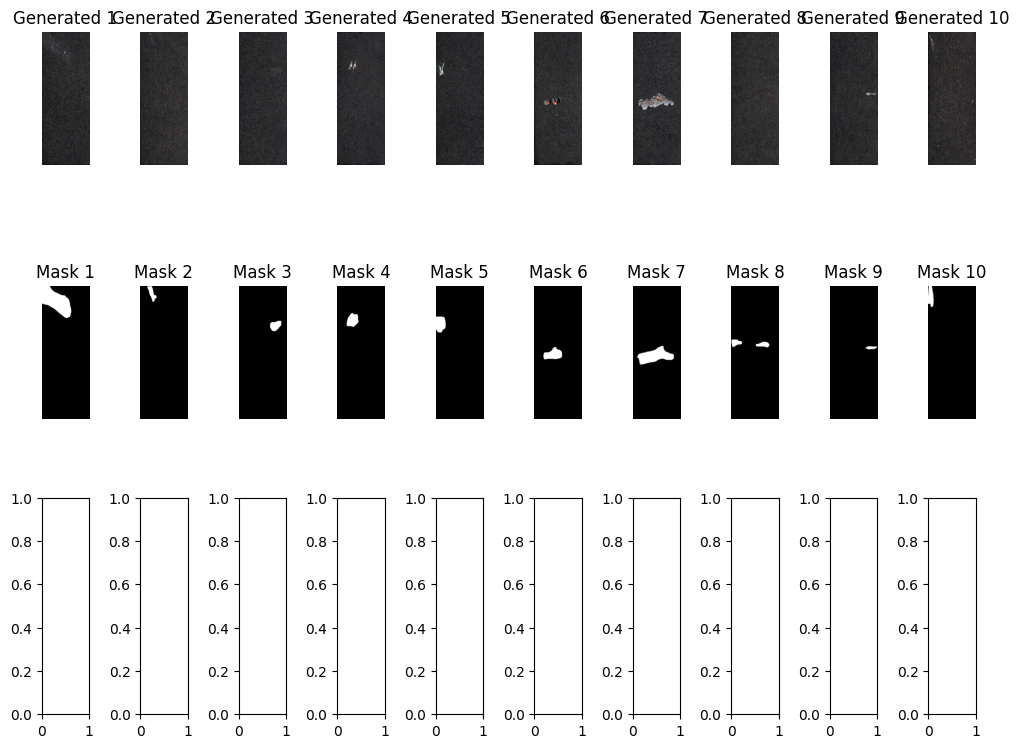

Ready for training with 10 synthetic images!


In [42]:
# Find and visualize generated images
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define paths
project_dir = '/content/drive/MyDrive/Diffusion_Project'
preprocessed_dir = f"{project_dir}/ksdd2_preprocessed"

# Find the augmented folder
possible_folders = [
    f"{preprocessed_dir}/augmented_0",
    f"{preprocessed_dir}/augmented_20",
    f"{preprocessed_dir}/augmented_10"
]

augmented_dir = None
for folder in possible_folders:
    if os.path.exists(folder):
        augmented_dir = folder
        break

if augmented_dir:
    imgs_dir = f"{augmented_dir}/imgs"
    masks_dir = f"{augmented_dir}/masks"

    if os.path.exists(imgs_dir):
        img_count = len(os.listdir(imgs_dir))
        print(f"Found {img_count} generated images in {augmented_dir}")

        # Show first 4 images
        img_files = sorted(os.listdir(imgs_dir))[:10]
        fig, axes = plt.subplots(3, 10, figsize=(10, 8))

        for i, img_file in enumerate(img_files):
            # Generated image
            img = Image.open(f"{imgs_dir}/{img_file}")
            axes[0, i].imshow(img)
            axes[0, i].set_title(f"Generated {i+1}")
            axes[0, i].axis('off')

            # Corresponding mask
            mask = Image.open(f"{masks_dir}/{img_file}")
            axes[1, i].imshow(mask, cmap='gray')
            axes[1, i].set_title(f"Mask {i+1}")
            axes[1, i].axis('off')

        plt.tight_layout()
        plt.show()

        print(f"Ready for training with {img_count} synthetic images!")
    else:
        print("Images folder not found")
else:
    print("No augmented folder found")
    print("Available folders:", os.listdir(preprocessed_dir))


In [46]:
# Experiment 1: Baseline (Full-shot without augmentation)
print("Experiment 1: Baseline Training (Full-shot, No Augmentation)")

!cd /content/drive/MyDrive/Diffusion_Project/DIAG && python train_ResNet50.py \
    --seed=0 \
    --epochs=30 \
    --batch_size=32 \
    --num_workers=2 \
    --dataset_path="{preprocessed_dir}"

print("Baseline training completed!")

Experiment 1: Baseline Training (Full-shot, No Augmentation)
--> Device: cuda
--> Loading Data from: /content/drive/MyDrive/Diffusion_Project/ksdd2_preprocessed
^C
Baseline training completed!


In [44]:
# Experiment 2: Full-shot with augmentation
print(" Experiment 2: Full-shot with Augmentation")

num_augmented = imgs_per_prompt * 2  # Total generated images

!cd /content/drive/MyDrive/Diffusion_Project/DIAG && python train_ResNet50.py \
    --seed=0 \
    --epochs=30 \
    --batch_size=32 \
    --num_workers=2 \
    --dataset_path="{preprocessed_dir}" \
    --add_augmented \
    --num_augmented={num_augmented} \

print("Full-shot + augmentation training completed!")

 Experiment 2: Full-shot with Augmentation
Loading KolektorSDD2 training set...
Number of samples: 2341
Loading KolektorSDD2 test set...
^C
Full-shot + augmentation training completed!


In [48]:
# Experiment 3: Zero-shot with augmentation (DIAG method)
print("Experiment 3: DIAG Method (Zero-shot + Augmentation)")

!cd /content/drive/MyDrive/Diffusion_Project/DIAG && python train_ResNet50.py \
    --seed=0 \
    --epochs=30 \
    --batch_size=32 \
    --num_workers=2 \
    --dataset_path="{preprocessed_dir}" \
    --zero_shot \
    --add_augmented \
    --num_augmented={num_augmented}

print("DIAG method training completed!")

Experiment 3: DIAG Method (Zero-shot + Augmentation)
--> Device: cuda
--> Loading Data from: /content/drive/MyDrive/Diffusion_Project/ksdd2_preprocessed
^C
DIAG method training completed!
